# We will work on Exploring and Analyzing Data about Titanic passengers ,Then find solutions to predict People surviving this trip.

# <img src="https://www.sayidaty.net/sites/default/files/imce/user168721/5765341-238860317.jpg" alt="بعد 34 عاماً من اكتشاف حطام التايتنك.. إليكم القصة التي لم تروَ | مجلة سيدتي" class="n3VNCb" jsname="HiaYvf" jsaction="load:XAeZkd;" data-noaft="1" style="width: 834px; height: 500.995px; margin: 0px;">

## This link is for data and describe it
### https://www.kaggle.com/c/titanic/data

##    Prepar data for Analysis & Modelling

In [1]:
# Importing libaraies

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Importing the datasets
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
print(train.shape)
print('-'*50)
print(test.shape)

(891, 12)
--------------------------------------------------
(418, 11)


**DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.
Now, let's understand the statistics that are generated by the describe() method:
count tells us the number of NoN-empty rows in a feature.
mean tells us the mean value of that feature.
std tells us the Standard Deviation Value of that feature.
min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
max tells us the maximum value of that feature.****

In [8]:
print('train.describe' ,train.describe()) 
print('-'*80)
print('test.describe' ,test.describe()) 

train.describe        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
------------------------------------------------------------------

##   cleaning data

In [9]:
print(train.dtypes)
print('-'*80)
print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
--------------------------------------------------------------------------------
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
data = pd.concat([train, test],axis=0,sort=False)

In [11]:
data.shape

(1309, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


#### Let's drop the PassengerId column. PassengerId column is seems to be an unique identifier for each row so we are dropping that it won't help us to find any insights from the data

In [13]:
data.drop(["PassengerId"],axis=1,inplace=True) 

##   Cleaning missing values 

In [14]:
print(data.isna().sum().sort_values(ascending=False))

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
dtype: int64


#### I will drop Cabin column because it has above 70% of missing values 

In [15]:
data.drop(["Cabin"],axis=1,inplace=True) 

### Extract Numerical & Categorical Features

In [16]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [17]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['Name', 'Sex', 'Ticket', 'Embarked']

 ### I Clean missing values using Random Value Imputation Because missing values is high in most features and This the best way to To maintain distrbuation For each feature.

In [18]:
### creating a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [19]:
for col in num_features:
    Random_value_imputation(col)

In [20]:
data[num_features].isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [21]:
data[cat_features].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    2
dtype: int64

### As rest of the features has less missing values,so I can fill it using mode concept(categorical data)

In [22]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [23]:
for col in cat_features:
    impute_mode(col)

In [24]:
data[cat_features].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

### Total unique categories in our categorical features to check if any dirtiness in data or not

In [25]:
for col in cat_features:
    print('{} has {} values '.format(col,train[col].unique()))
    print('\n')

Name has ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"

#### so Total unique categories doesnot have any dirtiness

### Outlier

# 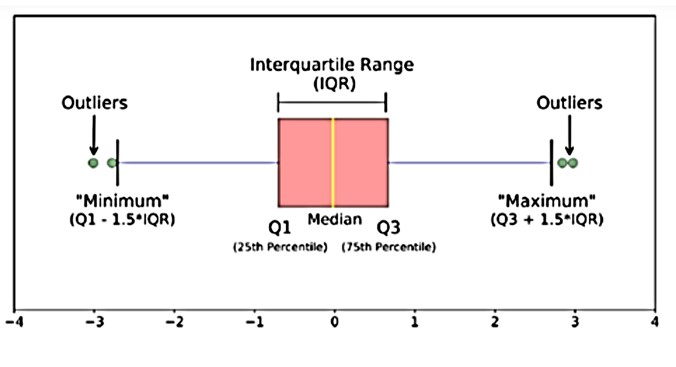

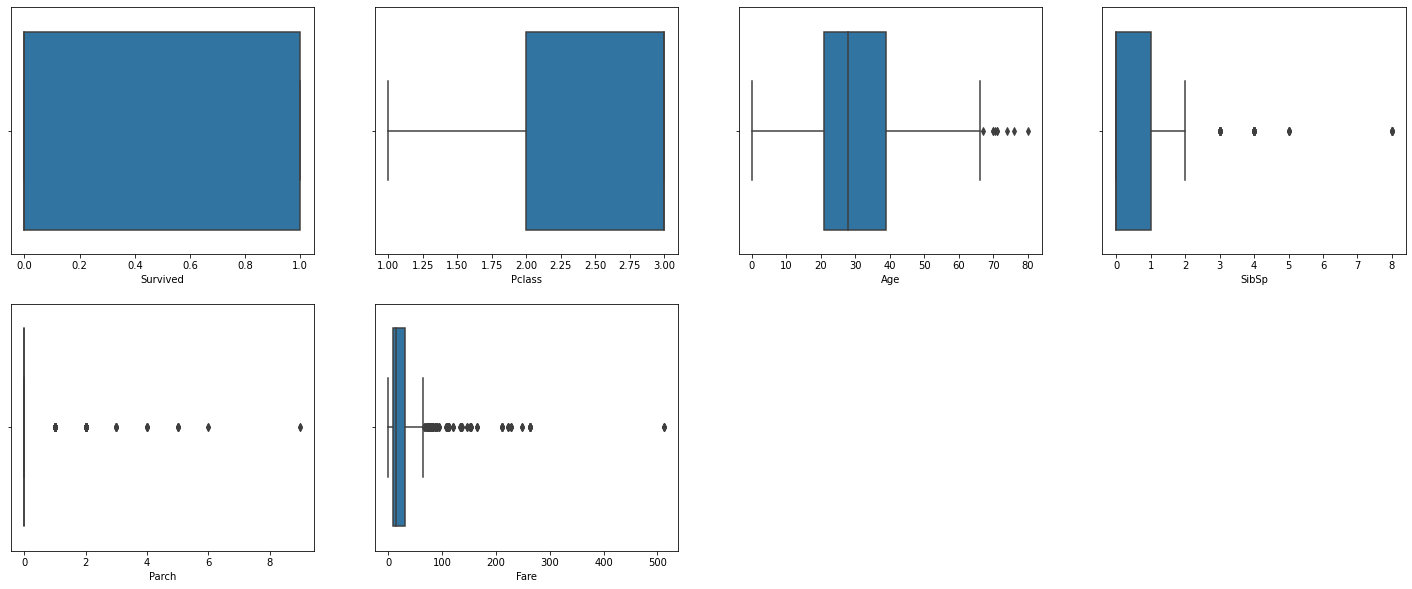

In [26]:
plt.figure(figsize=(25,10))
for i,col in enumerate(num_features):
    plt.subplot(2,4,i+1)
    sns.boxplot(data[col])

### Almost we don't have Outlier in our num_features

##  Analysing Distributions of data

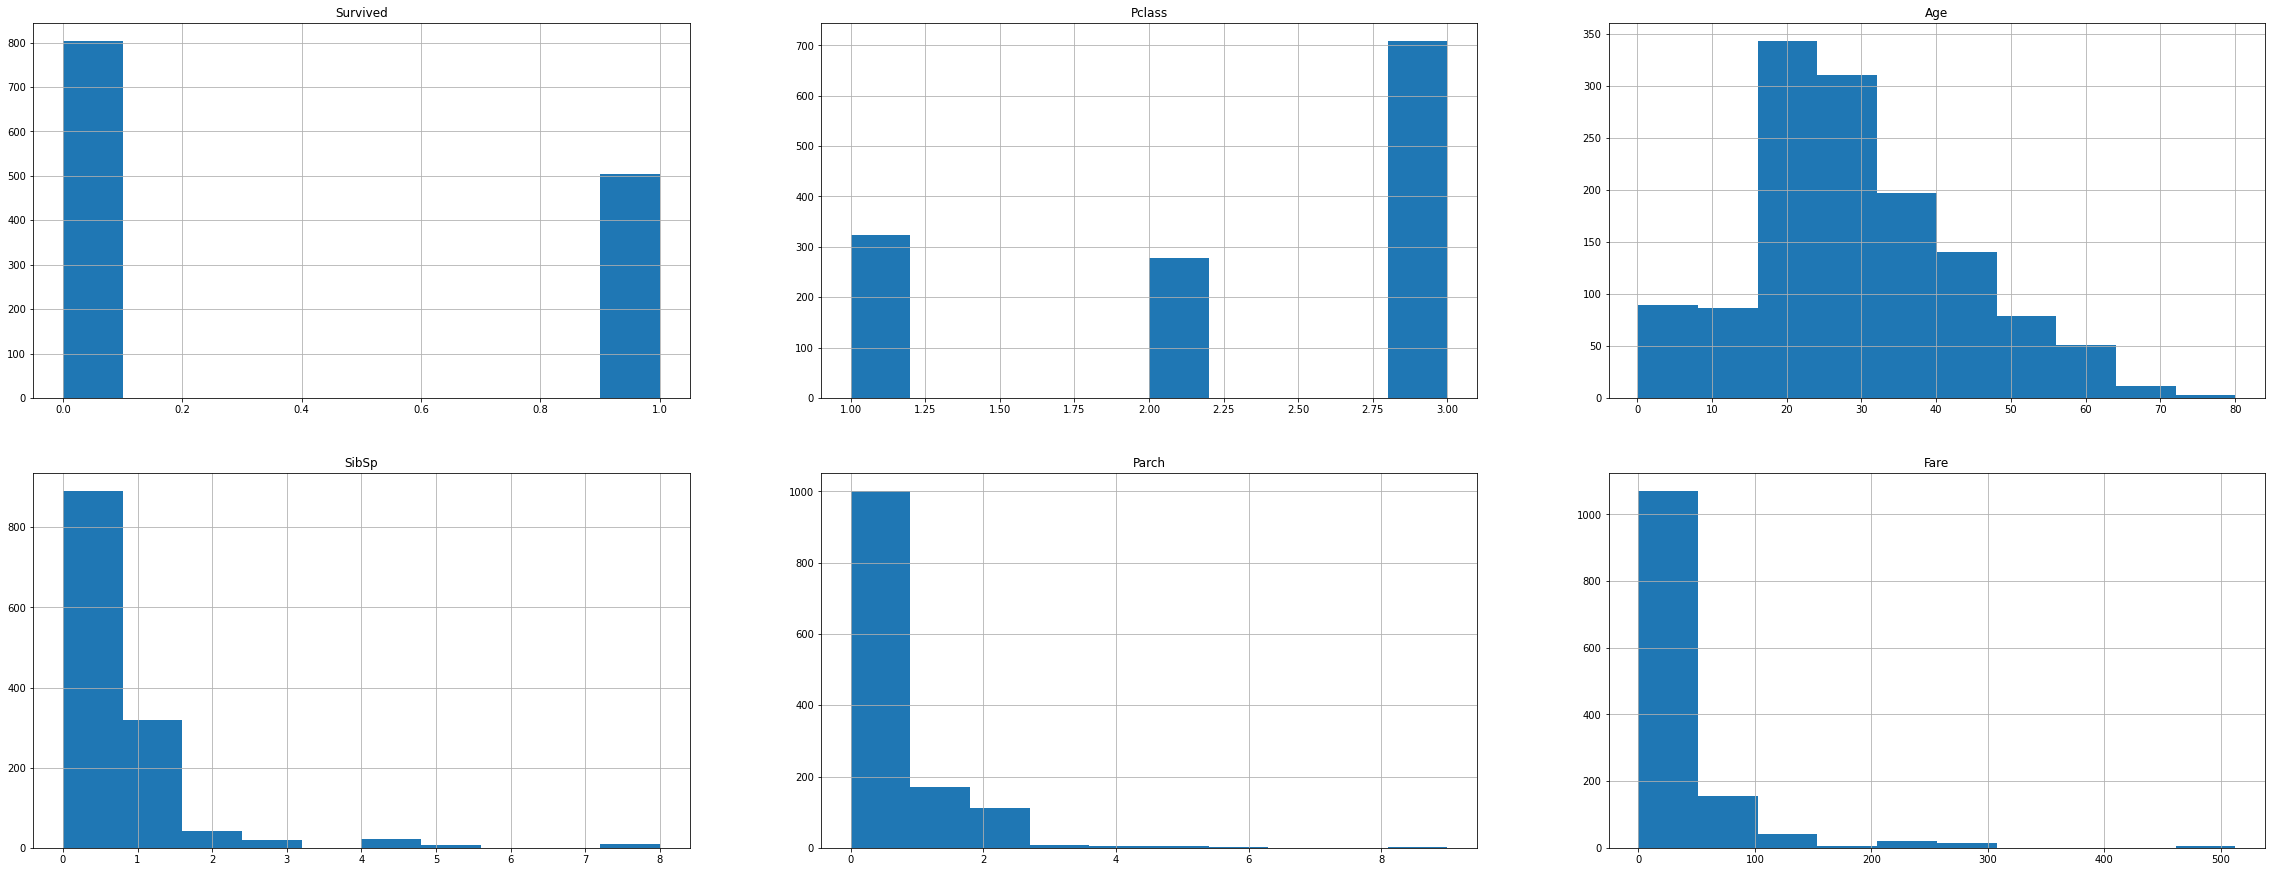

In [27]:
plt.figure(figsize=(40,40))
for i,feature in enumerate(num_features):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

### Observations:
    1.age looks a bit left skewed
    2.Fare is left skewed
    3.SibSp is also left skewed
    4.Parch is also left skewed

##  Exploring our data

In [28]:
data["Survived"].value_counts() * 100 / len(data) 

0.0    61.420932
1.0    38.579068
Name: Survived, dtype: float64

<AxesSubplot:ylabel='Survived'>

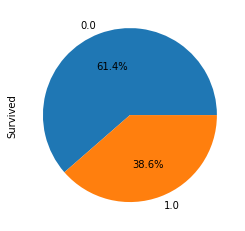

In [29]:
data["Survived"].value_counts().plot.pie(autopct = "%1.1f%%")

#### Survived-->> 61.2%
#### Unsurvived-->> 38.8%

<AxesSubplot:ylabel='Sex'>

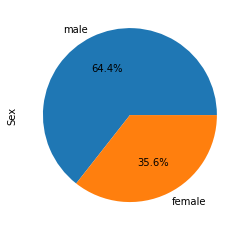

In [30]:
data["Sex"].value_counts().plot.pie(autopct = "%1.1f%%")

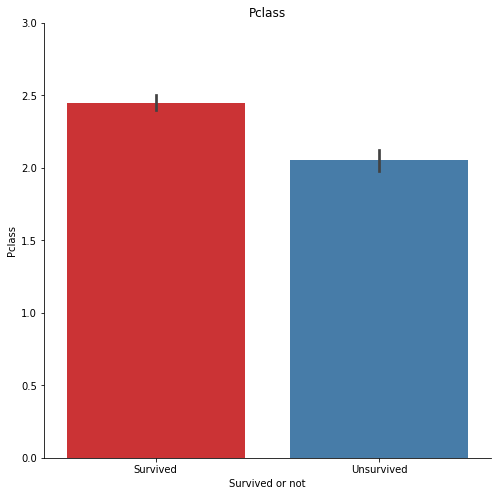

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(x='Survived',y='Pclass',data=data,palette='Set1')
plt.xticks([0,1],['Survived','Unsurvived'])
plt.ylim(0,3)
plt.xlabel('Survived or not')
plt.ylabel('Pclass')
plt.title("Pclass")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

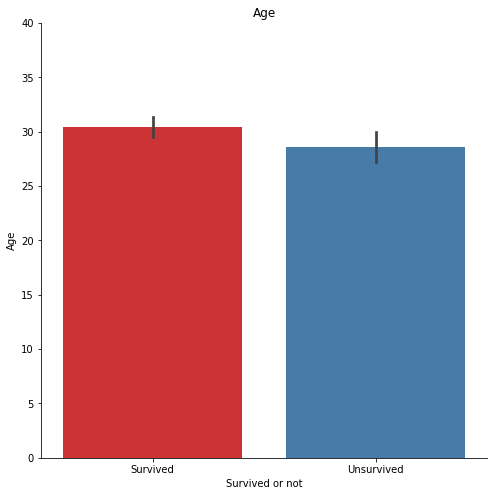

In [32]:
plt.figure(figsize=(8,8))
sns.barplot(x='Survived',y='Age',data=data,palette='Set1')
plt.xticks([0,1],['Survived','Unsurvived'])
plt.ylim(0,40)
plt.xlabel('Survived or not')
plt.ylabel('Age')
plt.title("Age")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

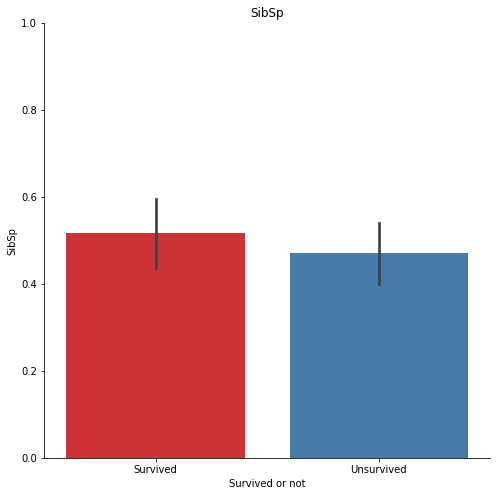

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(x='Survived',y='SibSp',data=data,palette='Set1')
plt.xticks([0,1],['Survived','Unsurvived'])
plt.ylim(0,1)
plt.xlabel('Survived or not')
plt.ylabel('SibSp')
plt.title("SibSp")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

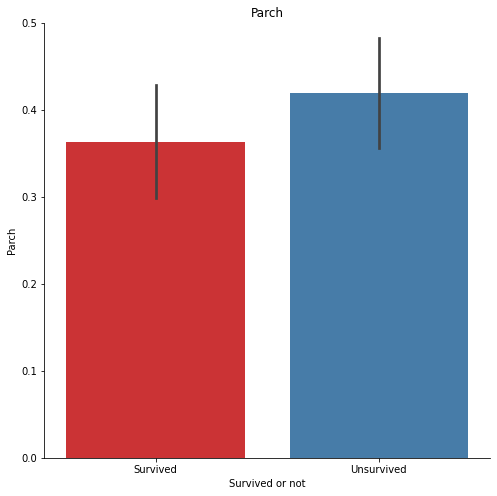

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(x='Survived',y='Parch',data=data,palette='Set1')
plt.xticks([0,1],['Survived','Unsurvived'])
plt.ylim(0,0.5)
plt.xlabel('Survived or not')
plt.ylabel('Parch')
plt.title("Parch")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

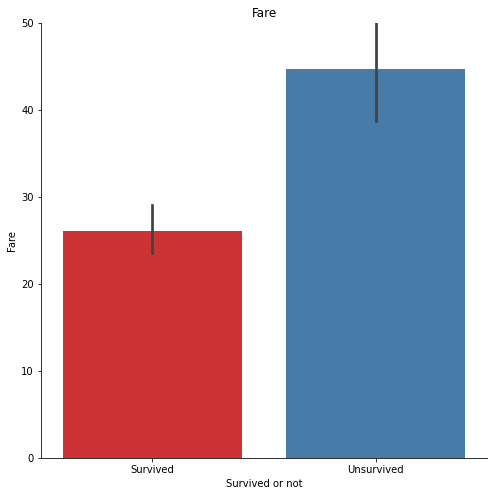

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(x='Survived',y='Fare',data=data,palette='Set1')
plt.xticks([0,1],['Survived','Unsurvived'])
plt.ylim(0,50)
plt.xlabel('Survived or not')
plt.ylabel('Fare')
plt.title("Fare")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [36]:
### Defining violin and scatter plot & kde_plot functions

def violin(col):
    fig = px.violin(data, y=col, x="Survived", color="Survived", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(data, x=col1, y=col2, color="Survived")
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="Survived",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

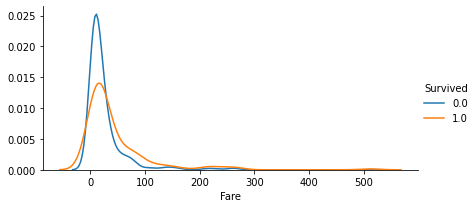

In [37]:
kde_plot('Fare')

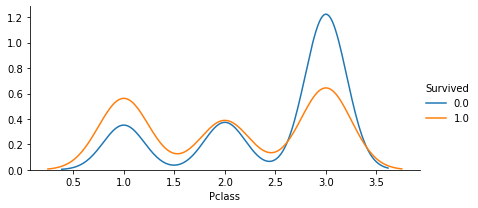

In [38]:
kde_plot('Pclass')

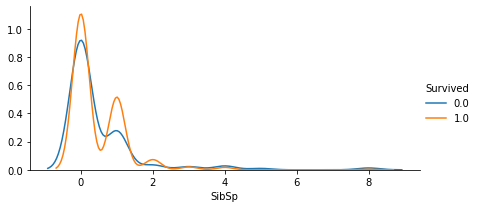

In [39]:
kde_plot('SibSp')

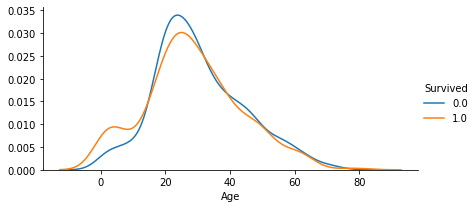

In [40]:
kde_plot('Age')

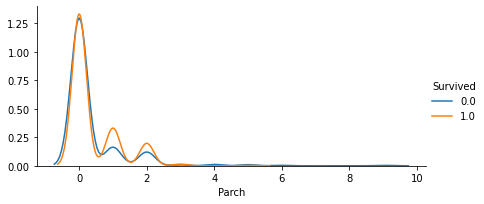

In [41]:
kde_plot('Parch')

In [42]:
violin('Age')

In [43]:
violin('Parch')

In [44]:
violin('Fare')

In [45]:
scatters('Age','Fare')

##  checking co-relation in our data

<AxesSubplot:>

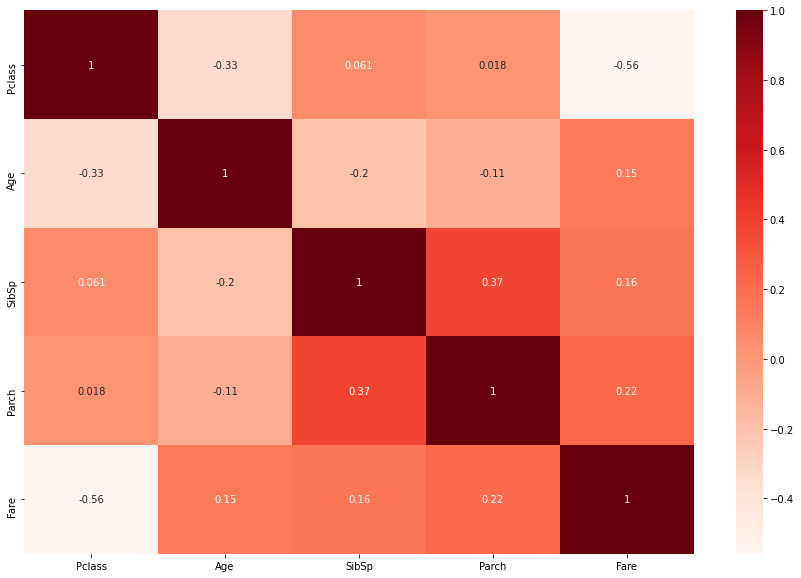

In [46]:
m=data.loc[:,data.columns!='Survived'].corr()
plt.figure(figsize=(15,10))
sns.heatmap(m,annot=True,cmap="Reds")

In [47]:
corelation=data.corr()["Survived"]
corelation

Survived    1.000000
Pclass     -0.230324
Age        -0.062972
SibSp      -0.020982
Parch       0.031853
Fare        0.174918
Name: Survived, dtype: float64

In [48]:
corelation.abs().sort_values(ascending=False)[1:]

Pclass    0.230324
Fare      0.174918
Age       0.062972
Parch     0.031853
SibSp     0.020982
Name: Survived, dtype: float64

In [49]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [50]:
## we can have the total family members as a feature
data['Family_members'] = data['SibSp'] + data['Parch']

In [51]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [52]:
data.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [53]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members
0,0.0,3,male,22.0,1,0,7.2500,S,1
1,1.0,1,female,38.0,1,0,71.2833,C,1
2,1.0,3,female,26.0,0,0,7.9250,S,0
3,1.0,1,female,35.0,1,0,53.1000,S,1
4,0.0,3,male,35.0,0,0,8.0500,S,0


##  Applying feature Encoding on our data

#### As we have just 2 categories in Sex feature and 3 categories in Embarked then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [54]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['Sex', 'Embarked']

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
for col in cat_features:
    data[col]=le.fit_transform(data[col])

In [58]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members
0,0.0,3,1,22.0,1,0,7.2500,2,1
1,1.0,1,0,38.0,1,0,71.2833,0,1
2,1.0,3,0,26.0,0,0,7.9250,2,0
3,1.0,1,0,35.0,1,0,53.1000,2,1
4,0.0,3,1,35.0,0,0,8.0500,2,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        1309 non-null   float64
 1   Pclass          1309 non-null   int64  
 2   Sex             1309 non-null   int64  
 3   Age             1309 non-null   float64
 4   SibSp           1309 non-null   int64  
 5   Parch           1309 non-null   int64  
 6   Fare            1309 non-null   float64
 7   Embarked        1309 non-null   int64  
 8   Family_members  1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 134.6 KB


In [60]:
# Seperating test and train sets

test_data = data.iloc[891:]

In [61]:
test_data.drop('Survived',axis=1,inplace=True)

In [62]:
train_data = data.iloc[:891]

In [63]:
 train_data= data.iloc[:891]

In [64]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members
0,0.0,3,1,22.0,1,0,7.2500,2,1
1,1.0,1,0,38.0,1,0,71.2833,0,1
2,1.0,3,0,26.0,0,0,7.9250,2,0
3,1.0,1,0,35.0,1,0,53.1000,2,1
4,0.0,3,1,35.0,0,0,8.0500,2,0


In [65]:
target_class = 'Survived'
target = train_data.pop(target_class)

In [66]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members
0,3,1,22.0,1,0,7.2500,2,1
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,0
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,0
887,1,0,19.0,0,0,30.0000,2,0
888,3,0,27.0,1,2,23.4500,2,3
889,1,1,26.0,0,0,30.0000,0,0


In [67]:
## importing libaraies for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [68]:
### Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression()

In [69]:
LogisticRegressionModel.fit(train_data,target)

LogisticRegression()

In [70]:
print(accuracy_score(target, LogisticRegressionModel.predict(train_data) ))

0.8024691358024691


In [71]:
### Applying KNeighborsClassifier Model 
KNeighborsModeL= KNeighborsClassifier(n_neighbors=10)

In [72]:
KNeighborsModeL.fit(train_data,target)

KNeighborsClassifier(n_neighbors=10)

In [73]:
print(accuracy_score(target, KNeighborsModeL.predict(train_data) ))

0.7530864197530864


In [74]:
### Applying RandomForestClassifier Model 
RandomForestModeL= RandomForestClassifier()

In [75]:
RandomForestModeL.fit(train_data,target)

RandomForestClassifier()

In [76]:
print(accuracy_score(target, RandomForestModeL.predict(train_data) ))

0.9842873176206509


## If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated - That will keep me motivated to update it on a regular basis